## SVM
Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem. 

In [14]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

In [15]:
bankdata = pd.read_csv("/Users/swaruptripathy/Desktop/Data Science and AI/datasets/bill_authentication.csv") 
bankdata.shape  

(1372, 5)

In [16]:
bankdata.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

In the first line of the script above, all the columns of the bankdata dataframe are being stored in the X variable except the "Class" column, which is the label column. The drop() method drops this column.

In the second line, only the class column is being stored in the y variable. At this point of time X variable contains attributes while y variable contains corresponding labels.

Class
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

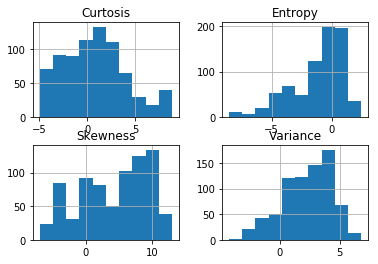

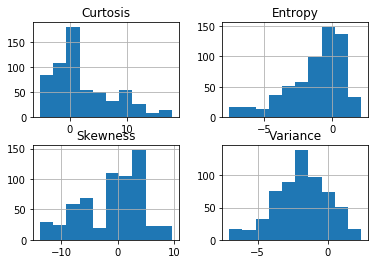

In [12]:
bankdata.groupby('Class').hist()

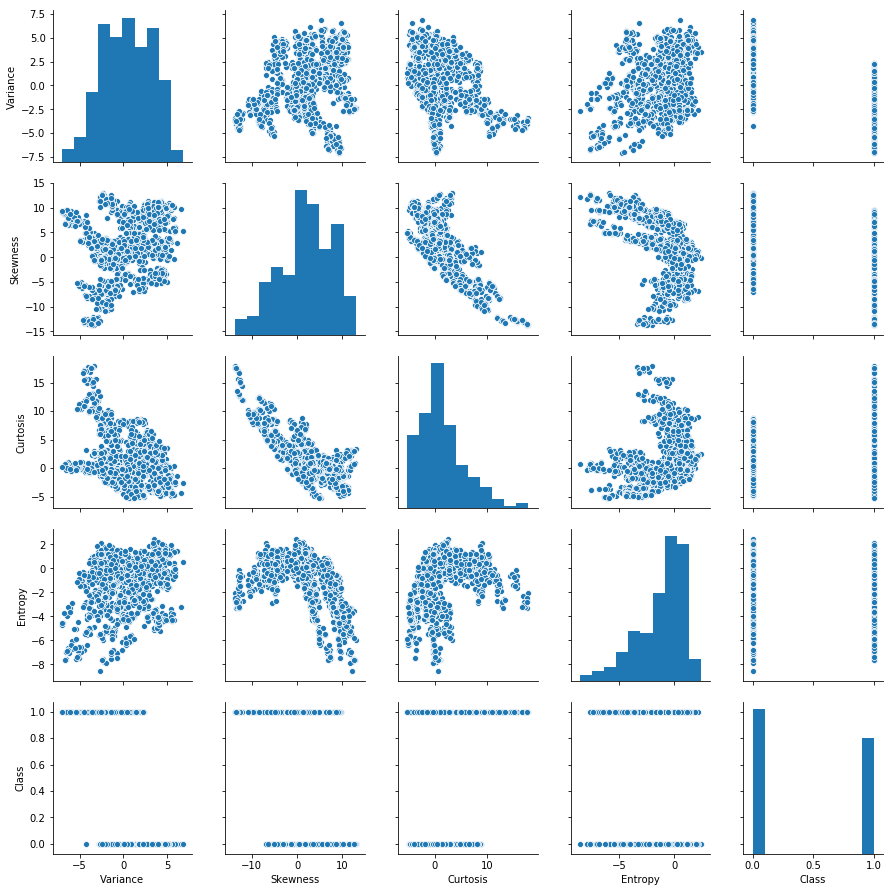

In [13]:
sb.pairplot(bankdata)

In [18]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
# Test train split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

Now we will train the algorithm. The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [8]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear', probability=True)  
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
# Making predictions
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [10]:
clf.support_vectors_

array([[-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 5.70600e-01, -2.48410e-02,  1.24210e+00, -5.62080e-01],
       [ 5.19470e-01, -3.26330e+00,  3.08950e+00, -9.84920e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.79840e-01,  7.09750e-01,  7.57160e-01, -4.44410e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [-7.86900e-01,  9.

In [11]:
len(clf.support_vectors_)

37

In [12]:
clf.score(X_test,y_test)

0.9890909090909091

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[154   2]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.98      0.99      0.99       119

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [14]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual    = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] 
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[4 2]
 [1 3]]
Accuracy Score : 0.7
Report : 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

   micro avg       0.70      0.70      0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [15]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [16]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [17]:
probs = clf.predict_proba(X_test)  
probs

array([[9.58788263e-03, 9.90412117e-01],
       [9.99997579e-01, 2.42086589e-06],
       [9.99999900e-01, 1.00000010e-07],
       [9.99985666e-01, 1.43338343e-05],
       [9.99999900e-01, 1.00000010e-07],
       [9.80007550e-09, 9.99999990e-01],
       [8.67417191e-11, 1.00000000e+00],
       [4.00019599e-10, 1.00000000e+00],
       [9.99998184e-01, 1.81632549e-06],
       [1.87608457e-11, 1.00000000e+00],
       [9.99998077e-01, 1.92303814e-06],
       [9.99999900e-01, 1.00000010e-07],
       [9.99999865e-01, 1.34682526e-07],
       [9.99999900e-01, 1.00000010e-07],
       [9.99994041e-01, 5.95901175e-06],
       [9.99996272e-01, 3.72826154e-06],
       [9.99999844e-01, 1.56106009e-07],
       [2.12639605e-11, 1.00000000e+00],
       [1.53402282e-05, 9.99984660e-01],
       [1.79952274e-02, 9.82004773e-01],
       [8.60528204e-06, 9.99991395e-01],
       [4.11953772e-02, 9.58804623e-01],
       [6.80697853e-08, 9.99999932e-01],
       [9.99959459e-01, 4.05413257e-05],
       [9.999998

In [18]:
probs = probs[:, 1]  
probs

array([9.90412117e-01, 2.42086589e-06, 1.00000010e-07, 1.43338343e-05,
       1.00000010e-07, 9.99999990e-01, 1.00000000e+00, 1.00000000e+00,
       1.81632549e-06, 1.00000000e+00, 1.92303814e-06, 1.00000010e-07,
       1.34682526e-07, 1.00000010e-07, 5.95901175e-06, 3.72826154e-06,
       1.56106009e-07, 1.00000000e+00, 9.99984660e-01, 9.82004773e-01,
       9.99991395e-01, 9.58804623e-01, 9.99999932e-01, 4.05413257e-05,
       1.81883894e-07, 9.47454167e-01, 8.16281868e-05, 1.66637674e-07,
       3.16654381e-06, 2.36706880e-07, 7.94483291e-01, 9.99998571e-01,
       9.99999505e-01, 1.00000000e+00, 5.87509892e-07, 9.93184293e-01,
       9.99999247e-01, 3.75092152e-07, 2.37820333e-01, 9.64375952e-07,
       7.91190959e-01, 8.33882772e-03, 1.00000010e-07, 1.00000010e-07,
       1.04803491e-07, 9.99999978e-01, 9.31806205e-01, 9.89728538e-01,
       9.99999924e-01, 1.42099126e-07, 8.60820017e-05, 3.04592302e-06,
       1.00000010e-07, 1.00000010e-07, 9.99991828e-01, 9.43111729e-01,
      

In [19]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 1.00


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  

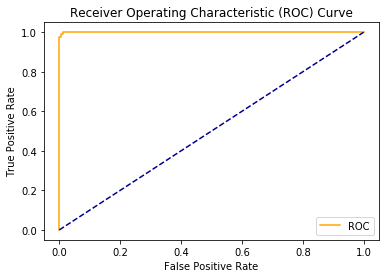

In [21]:
plot_roc_curve(fpr, tpr)  